In [1]:
pip list

Package             Version
------------------- ---------
amqp                5.0.6
appnope             0.1.2
argon2-cffi         20.1.0
asgiref             3.2.10
async-generator     1.10
attrs               21.2.0
backcall            0.2.0
bcrypt              3.2.0
billiard            3.6.4.0
bleach              3.3.0
blinker             1.4
celery              5.0.5
certifi             2020.6.20
cffi                1.14.3
chardet             3.0.4
click               7.1.2
click-didyoumean    0.0.3
click-plugins       1.1.1
click-repl          0.1.6
cycler              0.10.0
decorator           5.0.7
defusedxml          0.7.1
Django              3.1.2
dnspython           2.0.0
email-validator     1.1.1
entrypoints         0.3
Flask               1.1.2
Flask-Bcrypt        0.7.1
Flask-Email         1.4.4
Flask-Login         0.5.0
Flask-Mail          0.9.1
Flask-SQLAlchemy    2.4.4
Flask-WTF           0.14.3
gensim              4.0.1
idna                2.10
image               1.5.33

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix, accuracy_score

from gensim.models.doc2vec import TaggedDocument, Doc2Vec
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import remove_stopwords
from gensim.models.callbacks import CallbackAny2Vec

from nlp4all.models import *

/Users/Boulot/nlp4all/venv/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
/Users/Boulot/nlp4all/venv/lib/python3.8/site-packages/flask_sqlalchemy/__init__.py:833: FSADeprecationWarning: SQLALCHEMY_TRACK_MODIFICATIONS adds significant overhead and will be disabled by default in the future.  Set it to True or False to suppress this warning.
  warnings.warn(FSADeprecationWarning(


In [83]:
# getting a model from the db

for model in D2VModel.query.all():
    print(model.id, model.name)

model_id = 5
db_model = D2VModel.query.filter_by(id=model_id).first()
model = db_model.load()
db_model.name

1 Full model
2 Danish model
3 Danish model - no stopword
4 English model
5 English model - no stopwords


'English model - no stopwords'

In [11]:
class EpochLogger(CallbackAny2Vec):
    '''Callback to log information about training'''

    def __init__(self):
        self.epoch = 0

    def on_epoch_begin(self, model):
        print("Epoch #{} start".format(self.epoch))
    
    def on_epoch_end(self, model):
        self.epoch += 1

In [42]:
"""# train new models if needed
# model with more dimensions
high_dim_model = Doc2Vec(vector_size=300, min_count=5, epochs=300)

cats_numbers = english_cats
tweets = Tweet.query.filter(Tweet.category.in_(cats_numbers)).all()
#print(danish_tweets)

train_corpus = []
for tweet in tweets:
    if tweet.language == 'danish':
        train_corpus.append(TaggedDocument(danish_preprocessing(tweet.text), [tweet.id]))
    elif tweet.language == 'english':
        train_corpus.append(TaggedDocument(simple_preprocess(remove_stopwords(tweet.text)), [tweet.id]))

print("Start training model")
high_dim_model.build_vocab(train_corpus)
epoch_logger = EpochLogger()
high_dim_model.train(train_corpus, total_examples=high_dim_model.corpus_count, epochs=high_dim_model.epochs,
                    callbacks=[epoch_logger])"""

Start training model
Epoch #0 start
Epoch #1 start
Epoch #2 start
Epoch #3 start
Epoch #4 start
Epoch #5 start
Epoch #6 start
Epoch #7 start
Epoch #8 start
Epoch #9 start
Epoch #10 start
Epoch #11 start
Epoch #12 start
Epoch #13 start
Epoch #14 start
Epoch #15 start
Epoch #16 start
Epoch #17 start
Epoch #18 start
Epoch #19 start
Epoch #20 start
Epoch #21 start
Epoch #22 start
Epoch #23 start
Epoch #24 start
Epoch #25 start
Epoch #26 start
Epoch #27 start
Epoch #28 start
Epoch #29 start
Epoch #30 start
Epoch #31 start
Epoch #32 start
Epoch #33 start
Epoch #34 start
Epoch #35 start
Epoch #36 start
Epoch #37 start
Epoch #38 start
Epoch #39 start
Epoch #40 start
Epoch #41 start
Epoch #42 start
Epoch #43 start
Epoch #44 start
Epoch #45 start
Epoch #46 start
Epoch #47 start
Epoch #48 start
Epoch #49 start
Epoch #50 start
Epoch #51 start
Epoch #52 start
Epoch #53 start
Epoch #54 start
Epoch #55 start
Epoch #56 start
Epoch #57 start
Epoch #58 start
Epoch #59 start
Epoch #60 start
Epoch #61 sta

In [43]:
"""# adding high dim model to the db
db_model = D2VModel(name='English model - no stopwords',
                    description='English model with no stopwords ; dim=300', project=1)
db_model.save(high_dim_model)
db.session.add(db_model)
db.session.commit()"""

In [71]:
# choose tweets for the analysis

full_cats = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
danish_cats = [1,2,3,4,5,6,8,9,10,11]
english_cats = [7,12,13,14]


tweets_cats = english_cats
tweets = Tweet.query.filter(Tweet.category.in_(tweets_cats)).all()
tweets_ids = [tweet.id for tweet in tweets]

print(len(tweets))
print(len(tweets_ids))

cats_name = []
for cat in tweets_cats:
    tweet_cat = TweetTagCategory.query.filter_by(id=cat).first()
    print(tweet_cat.id, tweet_cat.name, '('+tweet_cat.language+')')
    cats_name.append(tweet_cat.name)

12911
12911
7 AndrewYang.json (english)
12 JoeBiden.json (english)
13 PeteButtigieg.json (english)
14 BernieSanders.json (english)


In [84]:
X = [model.dv[i] for i in tweets_ids]
labels = [tweet.category for tweet in tweets]
print(len(X[0]))
print(len(X))
print(len(labels))
X_train, X_test, y_train, y_test = train_test_split(X, labels, train_size=0.5)

"""# see if the data is well distributed between training and testing sets
plt.figure(1)
plt.hist(x=y_train, bins='auto', color='#0f5e01', alpha=0.7, rwidth=0.85)
plt.figure(2)
plt.hist(x=y_test, bins='auto', color='#9ced66', alpha=0.7, rwidth=0.85)"""

300
12911
12911


"# see if the data is well distributed between training and testing sets\nplt.figure(1)\nplt.hist(x=y_train, bins='auto', color='#0f5e01', alpha=0.7, rwidth=0.85)\nplt.figure(2)\nplt.hist(x=y_test, bins='auto', color='#9ced66', alpha=0.7, rwidth=0.85)"

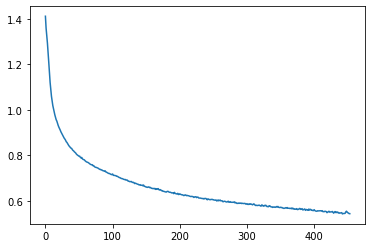

In [92]:
# create and train an ANN (keras is not working because of tf pip compatibility)
ANN = MLPClassifier(hidden_layer_sizes=[10,10], max_iter=2000,
                    activation='relu')
ANN.fit(X_train, y_train)
plt.plot(ANN.loss_curve_)
plt.show()

0.800309837335399


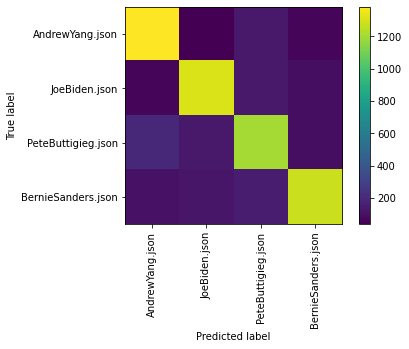

In [93]:
# confusion matrix on training set
accuracy = accuracy_score(y_train, ANN.predict(X_train))
print(accuracy)
plot_confusion_matrix(ANN, X_train, y_train, display_labels=cats_name, xticks_rotation='vertical',
                      include_values=False)
plt.savefig("image.png")

0.5142503097893433


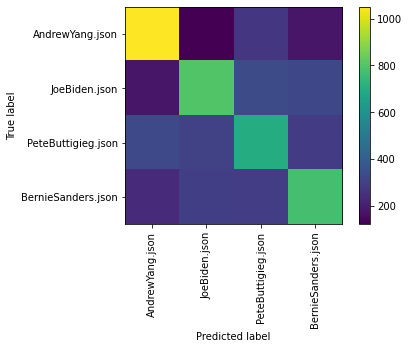

In [94]:
# confusion matrix on testing set
accuracy = accuracy_score(y_test, ANN.predict(X_test))
print(accuracy)
plot_confusion_matrix(ANN, X_test, y_test, display_labels=cats_name, xticks_rotation='vertical',
                      include_values=False)
plt.savefig("danish_10-10_train.png")

In [ ]:
### Danish remove stopwords

In [7]:
dan_sw = []
with open('danish_stopwords.txt', 'r') as file:
    for line in file:
        dan_sw.append(line)

        
for i in range(len(dan_sw)-1):
    dan_sw[i] = dan_sw[i][:-1]
    
dan_sw

['ad',
 'af',
 'aldrig',
 'alene',
 'alle',
 'allerede',
 'alligevel',
 'alt',
 'altid',
 'anden',
 'andet',
 'andre',
 'at',
 'bag',
 'bare',
 'begge',
 'bl.a.',
 'blandt',
 'blev',
 'blive',
 'bliver',
 'burde',
 'bør',
 'ca.',
 'da',
 'de',
 'dem',
 'den',
 'denne',
 'dens',
 'der',
 'derefter',
 'deres',
 'derfor',
 'derfra',
 'deri',
 'dermed',
 'derpå',
 'derved',
 'det',
 'dette',
 'dig',
 'din',
 'dine',
 'disse',
 'dit',
 'dog',
 'du',
 'efter',
 'egen',
 'ej',
 'eller',
 'ellers',
 'en',
 'end',
 'endnu',
 'ene',
 'eneste',
 'enhver',
 'ens',
 'enten',
 'er',
 'et',
 'f.eks.',
 'far',
 'fem',
 'fik',
 'fire',
 'flere',
 'flest',
 'fleste',
 'for',
 'foran',
 'fordi',
 'forrige',
 'fra',
 'fx',
 'få',
 'får',
 'før',
 'først',
 'gennem',
 'gjorde',
 'gjort',
 'god',
 'godt',
 'gør',
 'gøre',
 'gørende',
 'ham',
 'han',
 'hans',
 'har',
 'havde',
 'have',
 'hej',
 'hel',
 'heller',
 'helt',
 'hen',
 'hende',
 'hendes',
 'henover',
 'her',
 'herefter',
 'heri',
 'hermed',
 'herp

In [8]:
def danish_preprocessing(text, stopwords=dan_sw):
    new_text = simple_preprocess(text)
    preprocessed_text = []
    for word in new_text:
        if not (word in stopwords):
            preprocessed_text.append(word)
    return preprocessed_text

In [9]:
tweet = Tweet.query.filter_by(id=155).first()
print(tweet.text)
print(danish_preprocessing(tweet.text))


“Der er ikke længere noget, der er for småt eller ligegyldigt til at man kan føle sig krænket.” Spot on, @twitter_ID 👍🏼💪🏼😊 @twitter_ID #hashtag
['småt', 'ligegyldigt', 'føle', 'krænket', 'spot', 'on', 'twitter_id', 'twitter_id', 'hashtag']
